**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

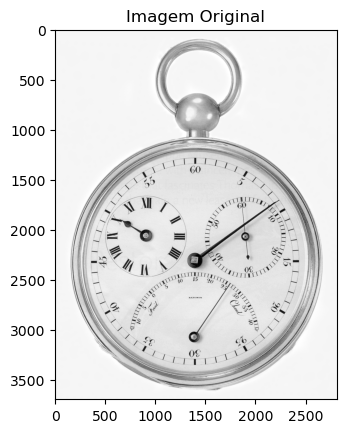

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


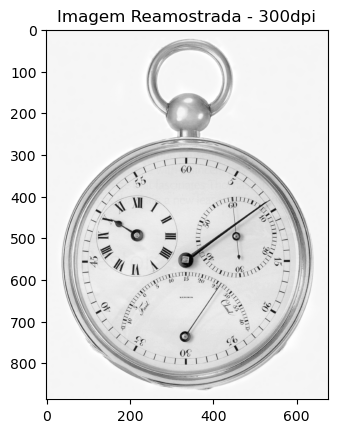

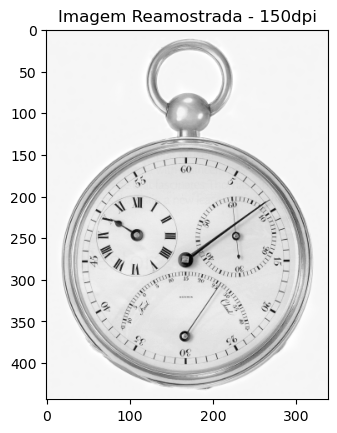

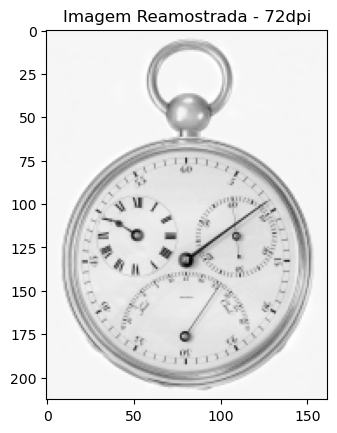

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def pixel_resample(image, original_dpi, resultant_dpi):
    
    #Verifica se os valores de dpi informados são válidos.
    if resultant_dpi >= original_dpi:
        print("Invalid operation. Resampling the pixels of an image implies a reduction in dpi.")
        return image
    
    reduction_factor = original_dpi / resultant_dpi
    original_lines = image.shape[0]
    original_columns = image.shape[1]
    
    #Cria uma lista para armazenar os pixels da nova imagem.
    resultant_image = []
    
    #Itera pelos pixels da imagem original, agrupa os pixels em blocos e calcula uma média.
    line_it = 0
    while line_it < original_lines:
        initial_line = round(line_it)
        final_line = round(line_it + reduction_factor)
        line_pixels = []
        
        column_it = 0
        while column_it < original_columns:
            initial_column = round(column_it)
            final_column = round(column_it + reduction_factor)
            line_pixels.append(np.mean(np.array(image[initial_line:final_line,initial_column:final_column])))
            
            column_it += reduction_factor
        
        line_it += reduction_factor
        
        resultant_image.append(line_pixels)
    
    #Retorna a imagem resultante.
    return np.array(resultant_image)

#Lê a imgem original.
imagem = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)

#Mostra a imagem original.
plt.plot(1, 1, 1)
plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")

plt.show()

#Gera e mostra as imagems reamostradas.
plt.plot(3, 1, 1)
plt.imshow(pixel_resample(imagem, 1250, 300), cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Reamostrada - 300dpi")

plt.show()

plt.plot(3, 1, 2)
plt.imshow(pixel_resample(imagem, 1250, 150), cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Reamostrada - 150dpi")

plt.show()

plt.plot(3, 1, 3)
plt.imshow(pixel_resample(imagem, 1250, 72), cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Reamostrada - 72dpi")

plt.show()

2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

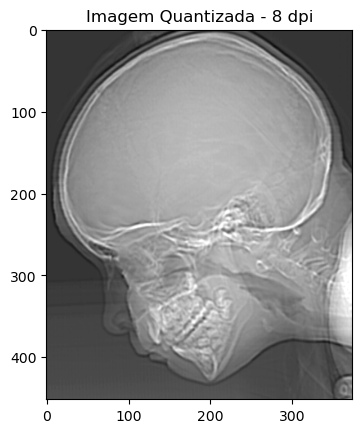

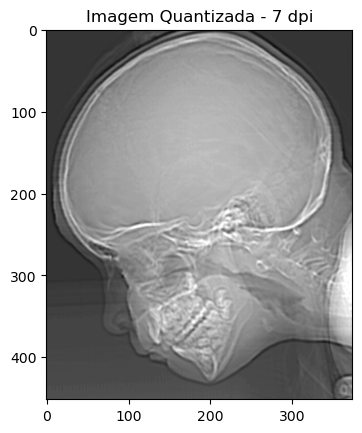

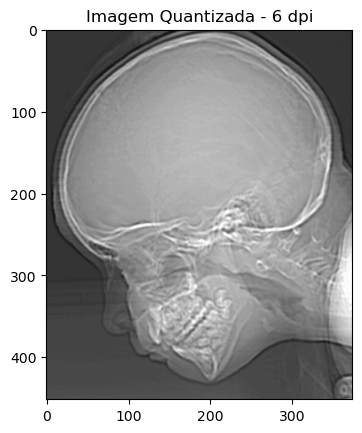

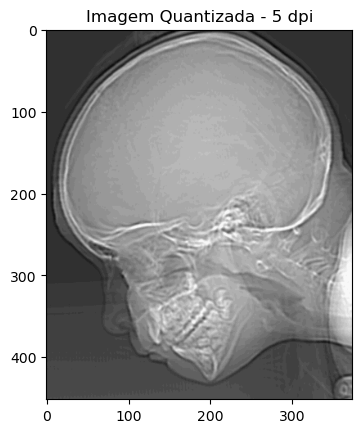

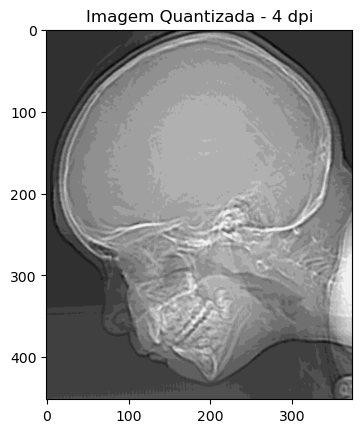

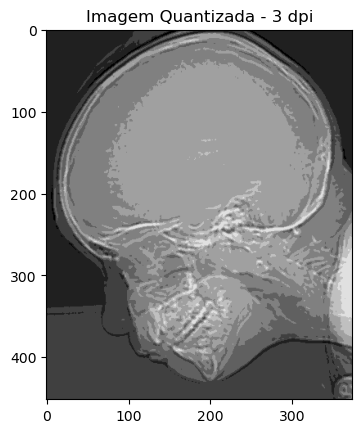

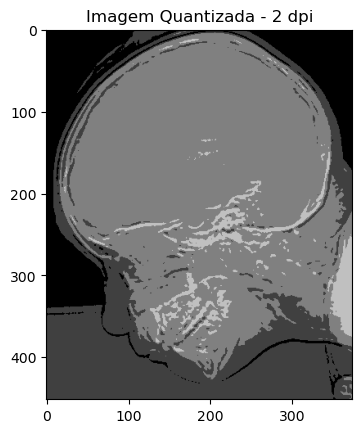

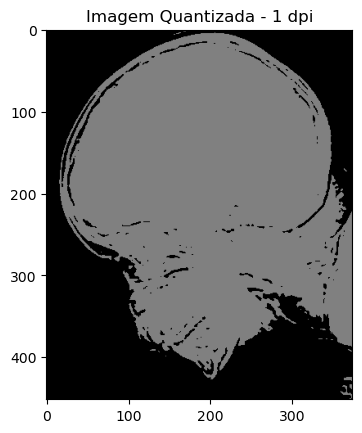

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def pixel_quantize(image, original_bits, resultant_bits):
    
    #Verifica se os valores de bits informados são válidos.
    if resultant_bits >= original_bits:
        print("Invalid operation. Quantizing the pixels of an image implies a reduction in the number of bits.")
        return image
    
    values_per_tone = 2**resultant_bits
    for values_it in range(0, 2**original_bits, values_per_tone):
        image = np.where((image >= values_it) & (image < (values_it+values_per_tone)), values_it, image)
    
    return image

#Lê a imgem original.
imagem = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)
linhas = imagem.shape[0]
colunas = imagem.shape[1]

#Gera e mostra as imagems quantizadas.
for i in range(8):
    plt.plot(i+1, 1, 1)
    plt.imshow(pixel_quantize(np.array(imagem), 8, i), cmap='gray', vmin=0, vmax=255)
    plt.title("Imagem Quantizada - " + str(8-i) + " dpi")
    plt.show()